# BGGN 212 Co-evolution Project

In [2]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import parser
def coEvo(X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<100000):
        if ( X <= 0) or ( Y<=0):
            break
        rate1 = parser.expr(expr1).compile()
        rate2= parser.expr(expr2).compile()
        rate3 = parser.expr(expr3).compile()
        rate4= parser.expr(expr4).compile()
        
       
        u1a =eval(rate1)
        u1s =eval(rate2)
        u2a =eval(rate3)
        u2s =eval(rate4)
        
#         u1a =num1-(X*_alpha1)
#         u1s =num2-(X *_beta1) 
#         u2a =num1-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0
        
        
        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
        if W == 0: break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1

        data[count1,:]=[t, X, Y]
        count1+=1
        
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;


In [ ]:
import parser
def coEvo(X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
   
    # Main loop
    while t < T and ((count1)<100000):
        if ( X <= 0) or ( Y<=0):
            break
        rate1 = parser.expr(expr1).compile()
        rate2= parser.expr(expr2).compile()
        rate3 = parser.expr(expr3).compile()
        rate4= parser.expr(expr4).compile()
        
       
        u1a =eval(rate1)
        u1s =eval(rate2)
        u2a =eval(rate3)
        u2s =eval(rate4)
        
#         u1a =num1-(X*_alpha1)
#         u1s =num2-(X *_beta1) 
#         u2a =num1-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0
        
        
        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
        if W == 0: break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1

        data[count1,:]=[t, X, Y]
        count1+=1
        
    data=data[0:count1,:]
    
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;


## I. All u are the same. 
### (1.) No a (antagonistic) mutations

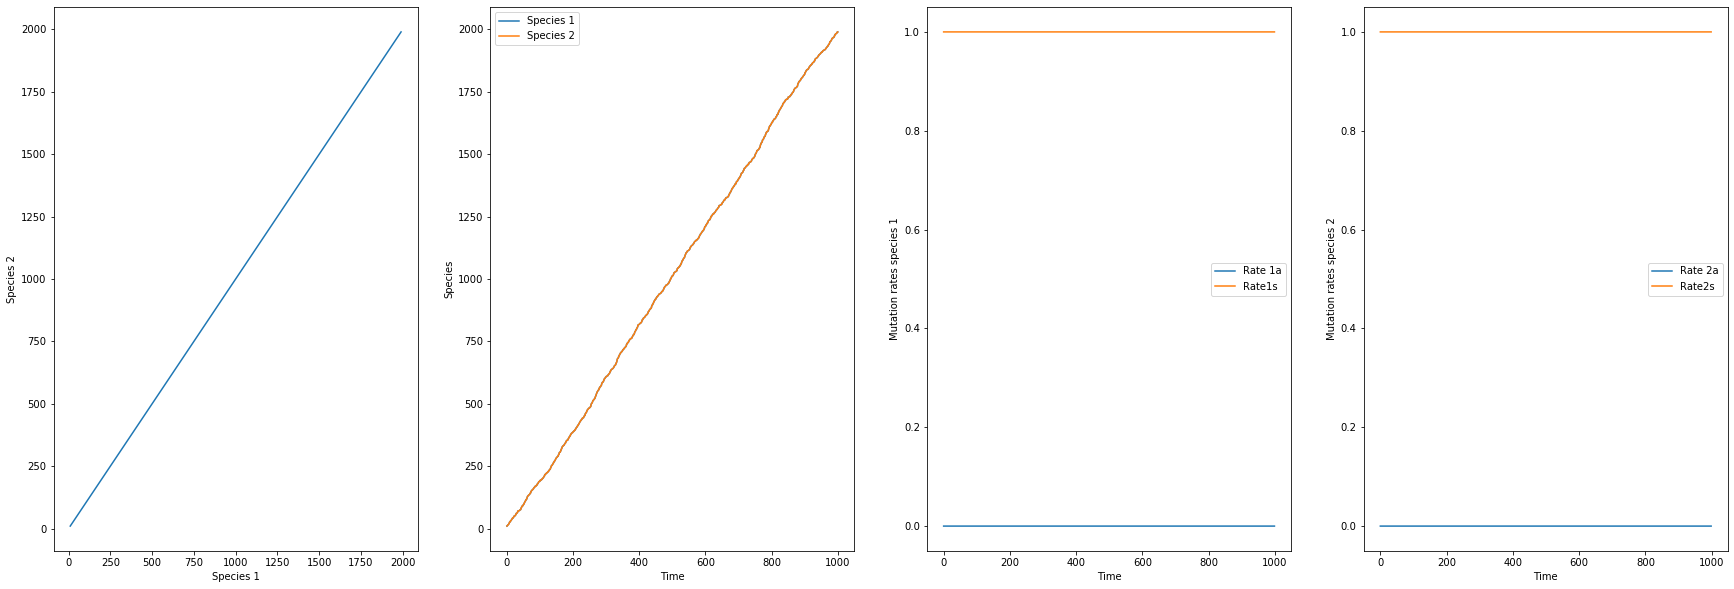

In [6]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=1
u2a=0
u2s=1
num1=0  # not needed
num2=0 

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (2.) No s(synergistic) mutations

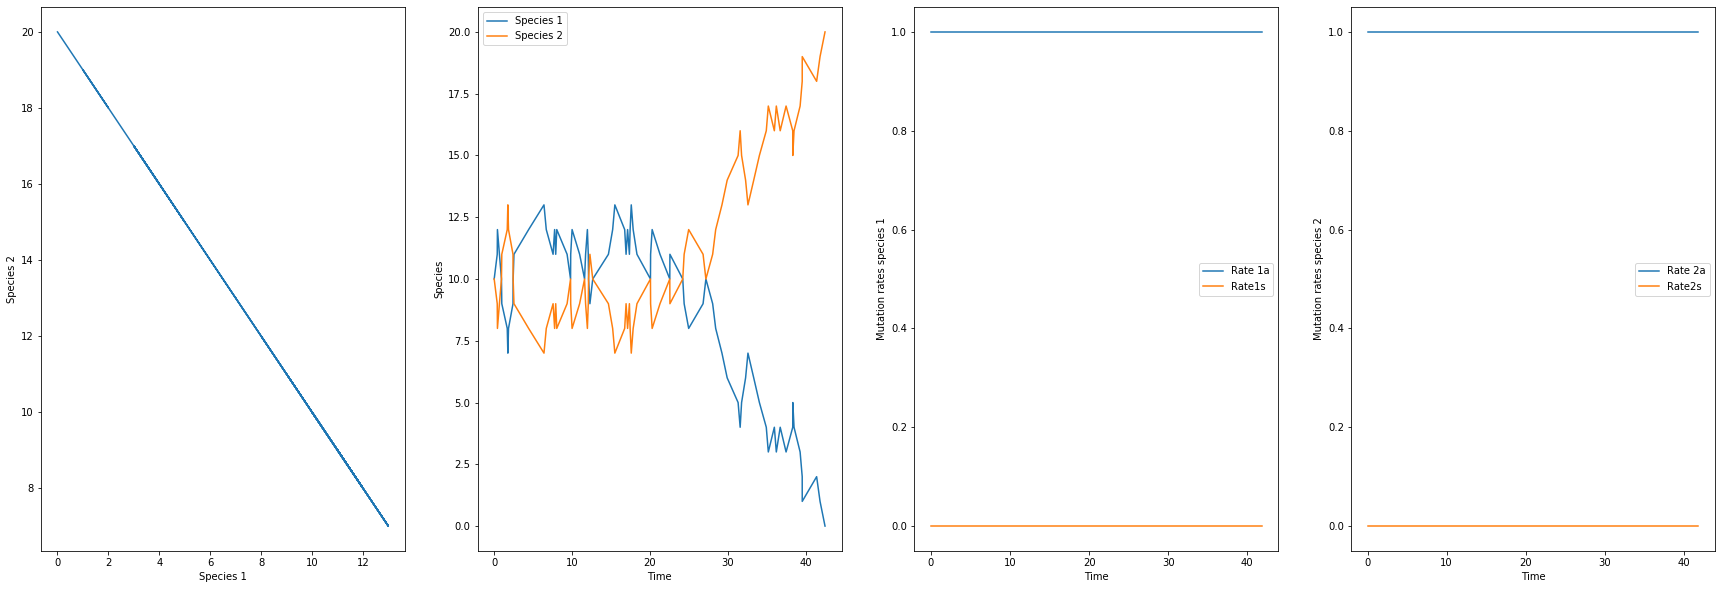

In [13]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1.0
u1s=0
u2a=1.0
u2s=0

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (3.) 50% - 50% a and s.

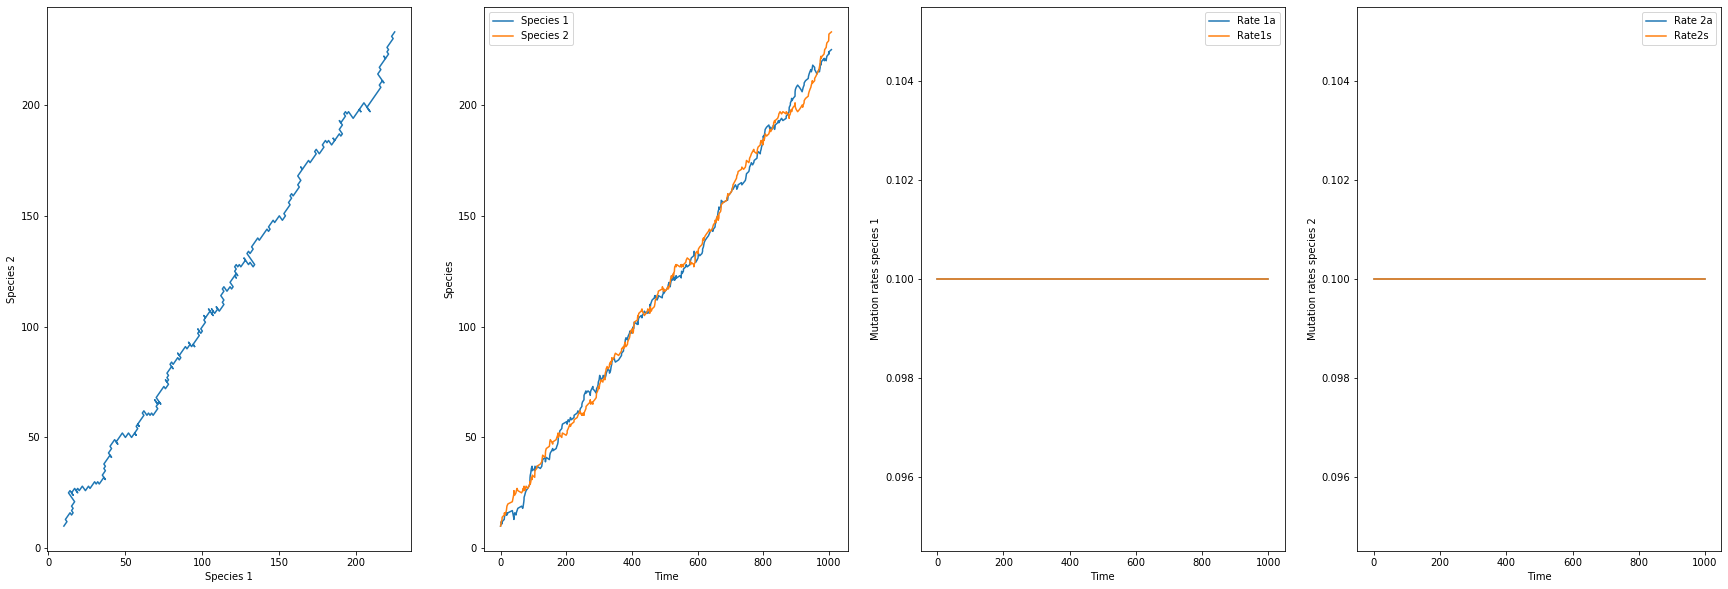

In [18]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

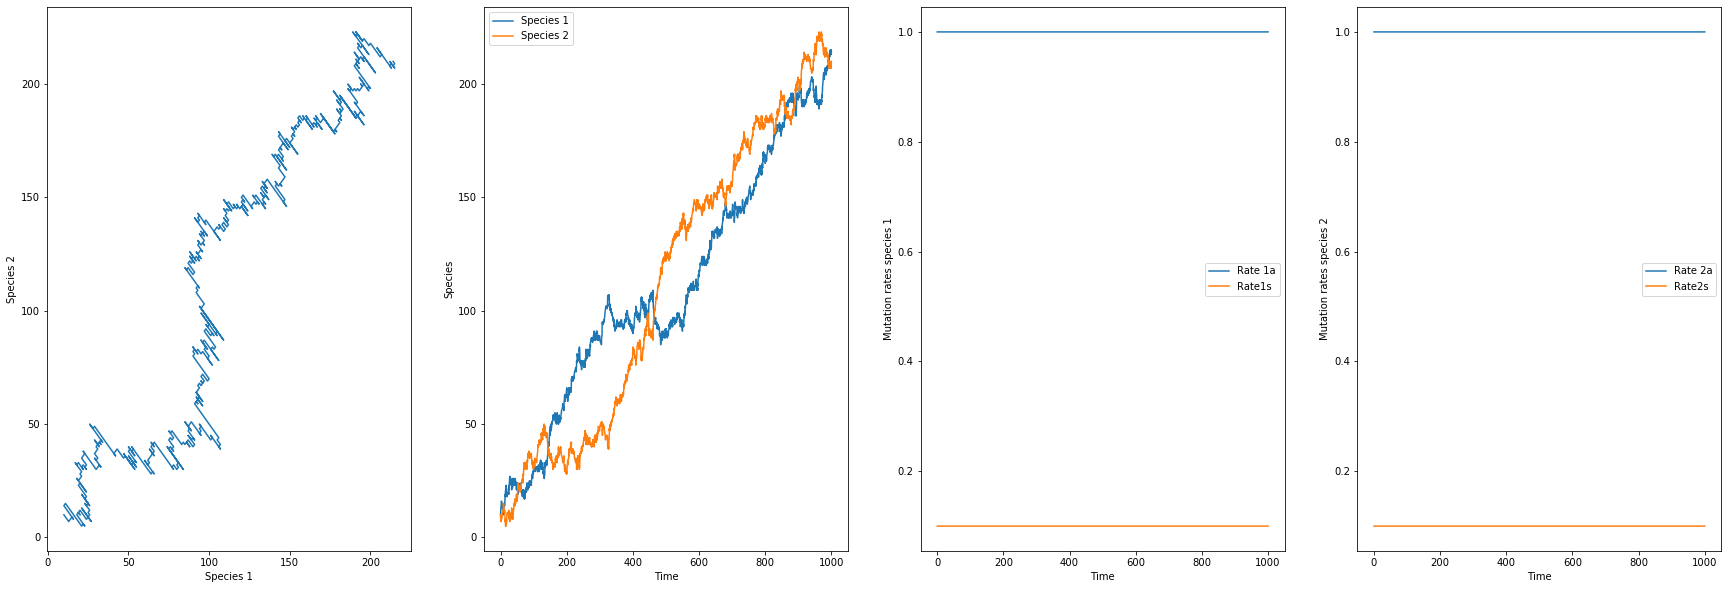

In [22]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1
u1s=0.1
u2a=1
u2s=0.1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

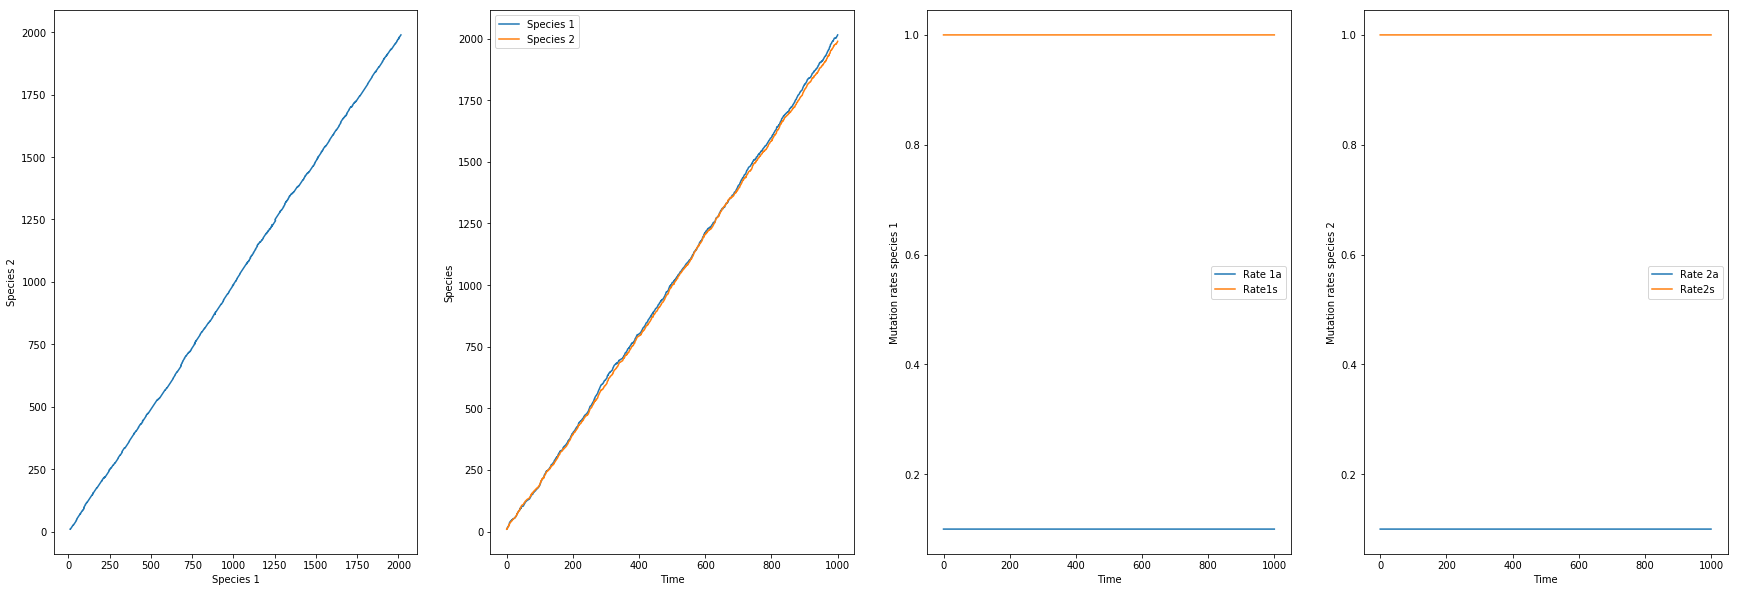

In [31]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=1
u2a=0.1
u2s=1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## III. Species are symmetric. And rates depend on fitness. Keep slopes the same

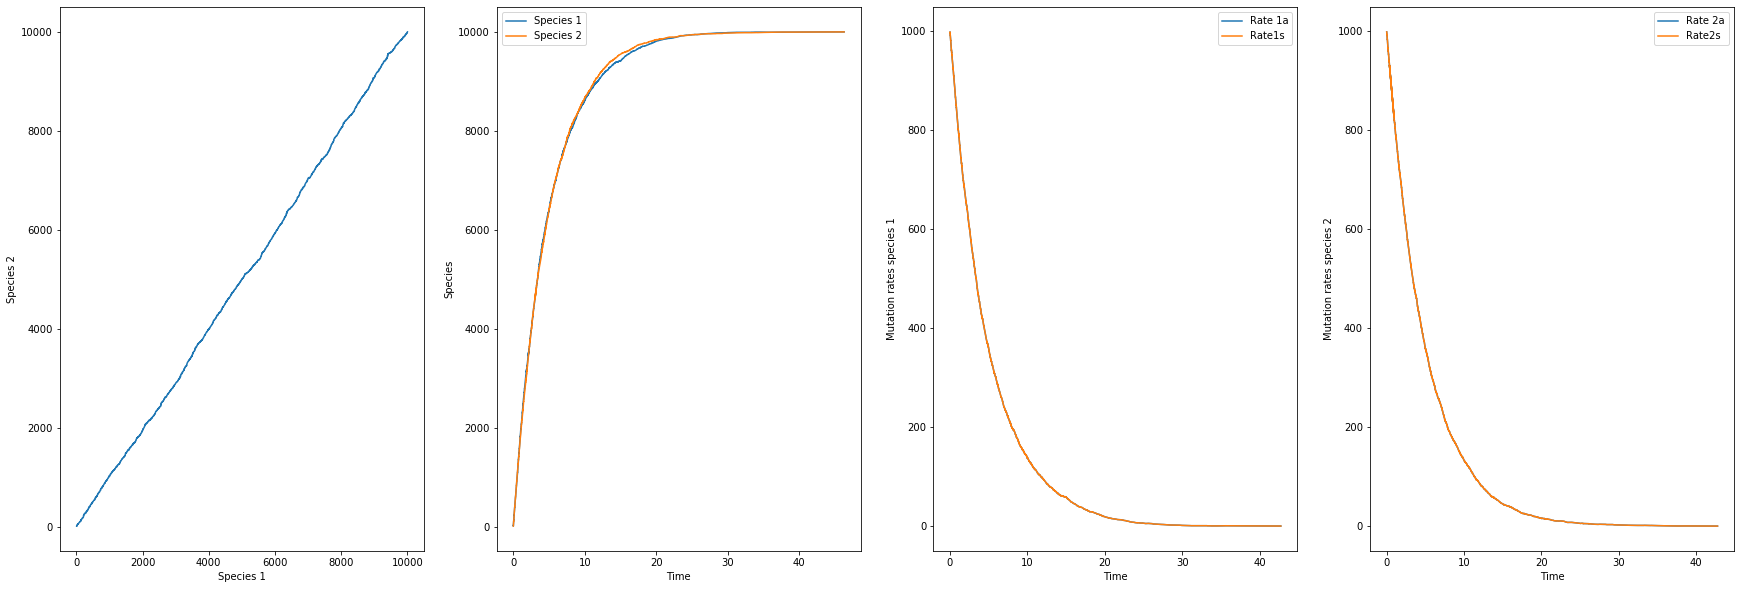

In [23]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0.1
_beta1 = 0.1
_alpha2 = 0.1
_beta2 = 0.1

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

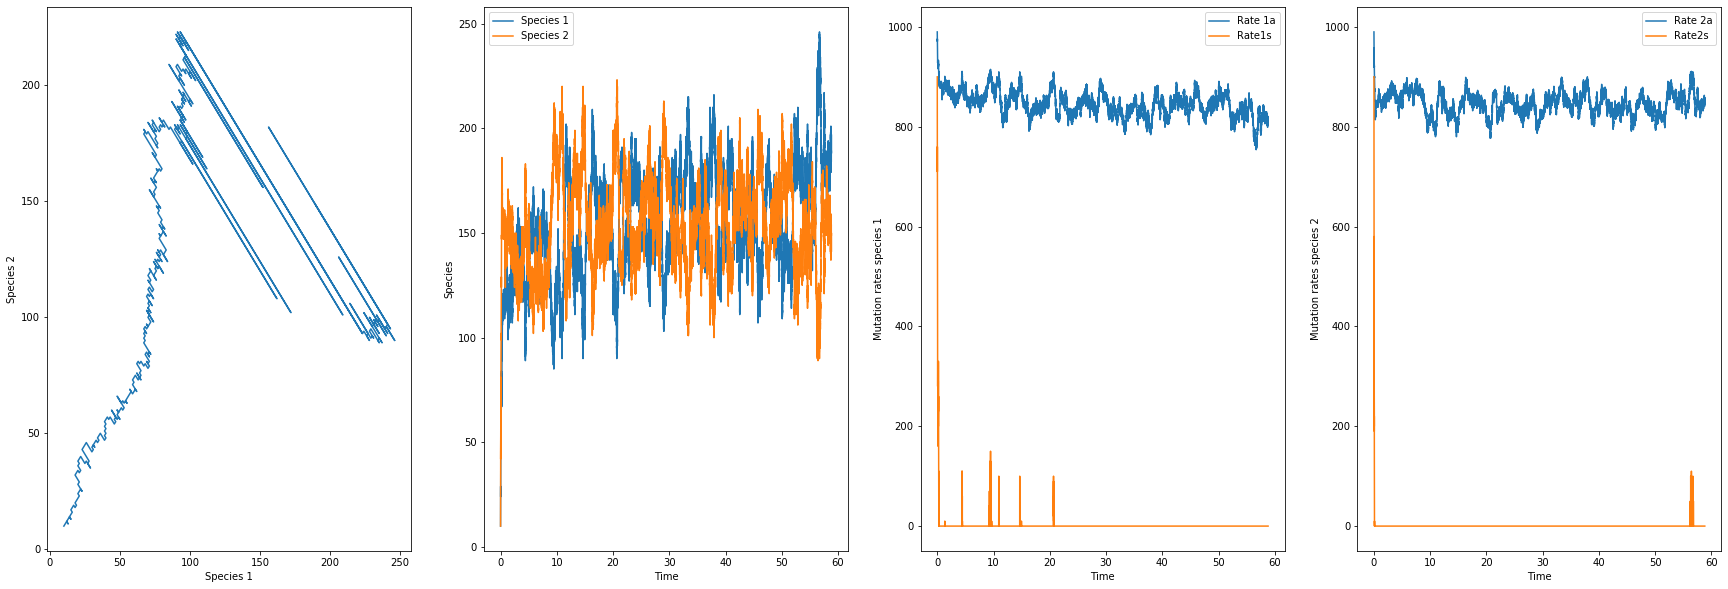

In [16]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 1#antagonistic 1 thereofore slow decrease with respect to X
_beta1 = 10 #synergistic
_alpha2 = 1
_beta2 = 10

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

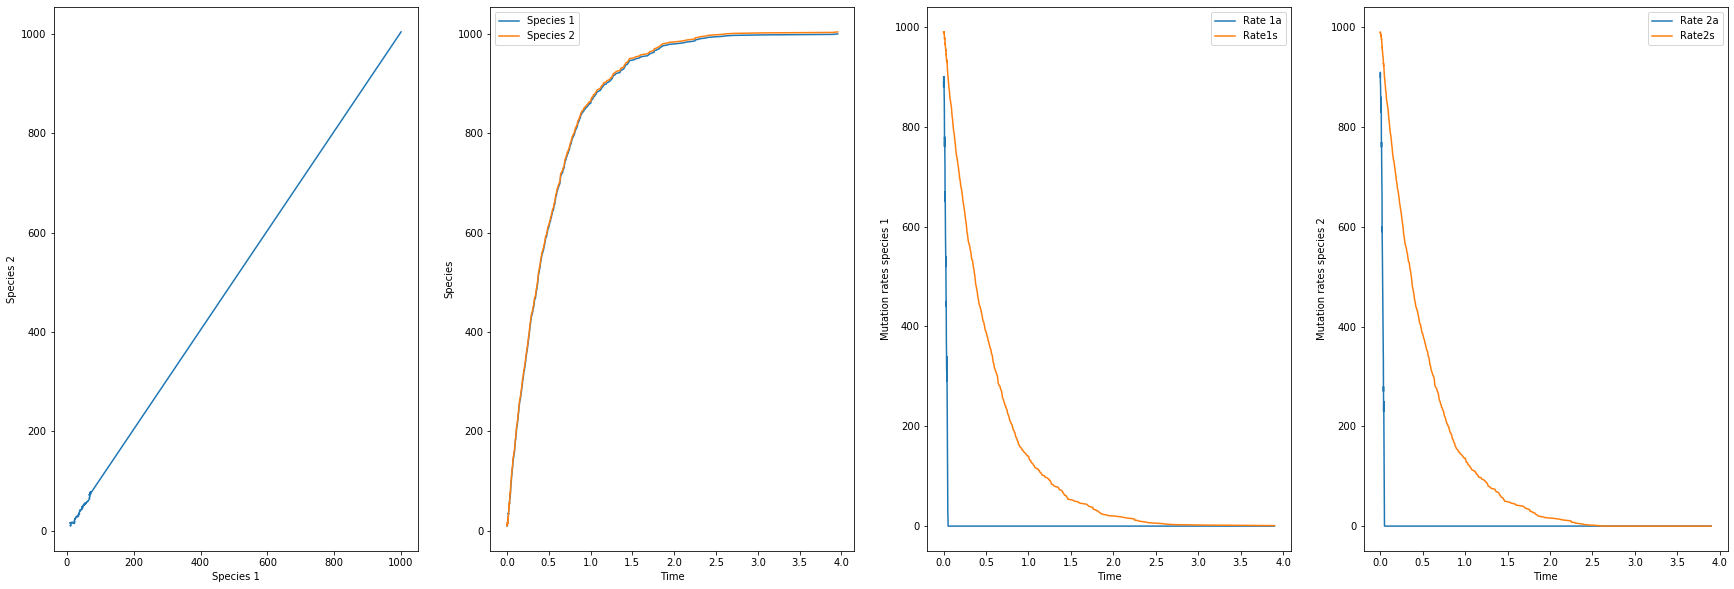

In [25]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 10
_beta1 = 1
_alpha2 = 10
_beta2 = 1

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

### Case 3: Slopes depend on fitness such that they are dependent on time such that there is an interesection between these 2

#### Synergistic more later on

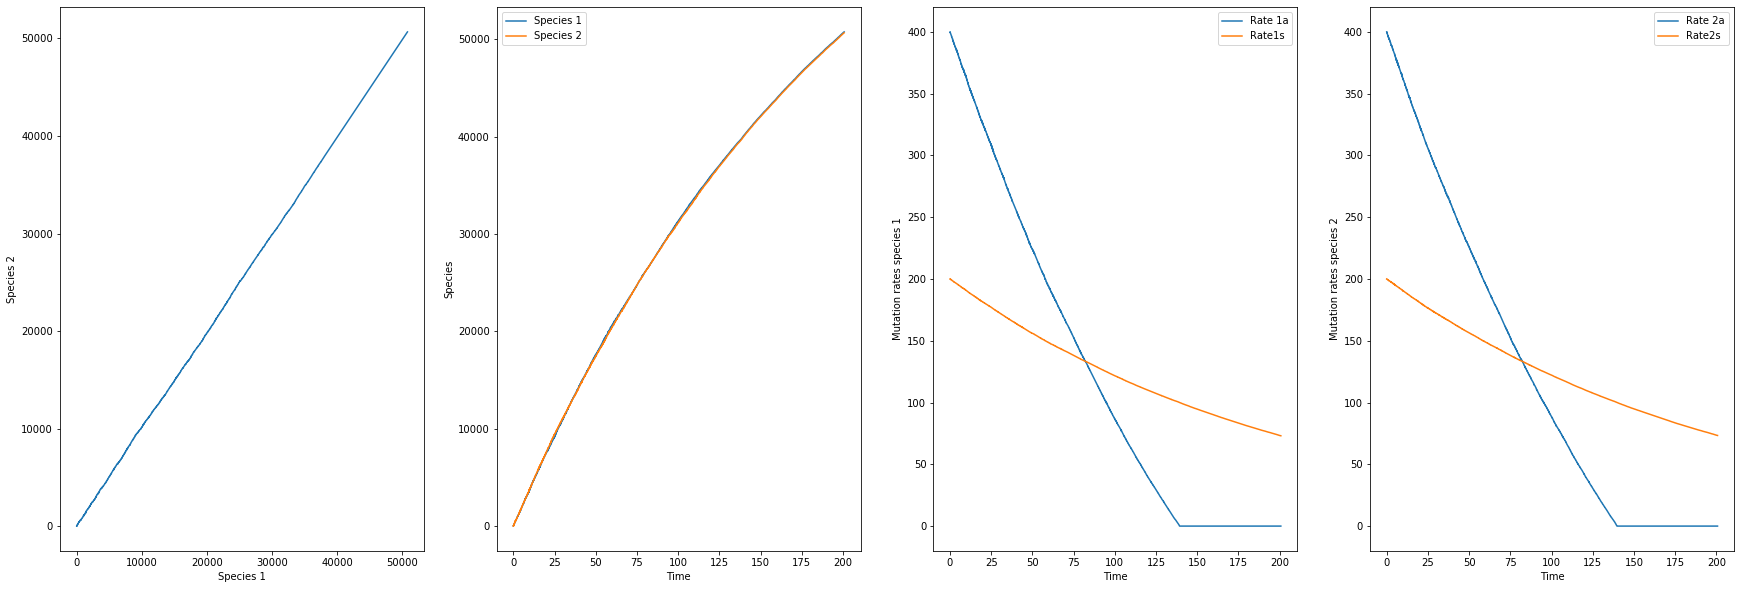

In [17]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.01
_beta1=0.0025
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#### Antagonist more


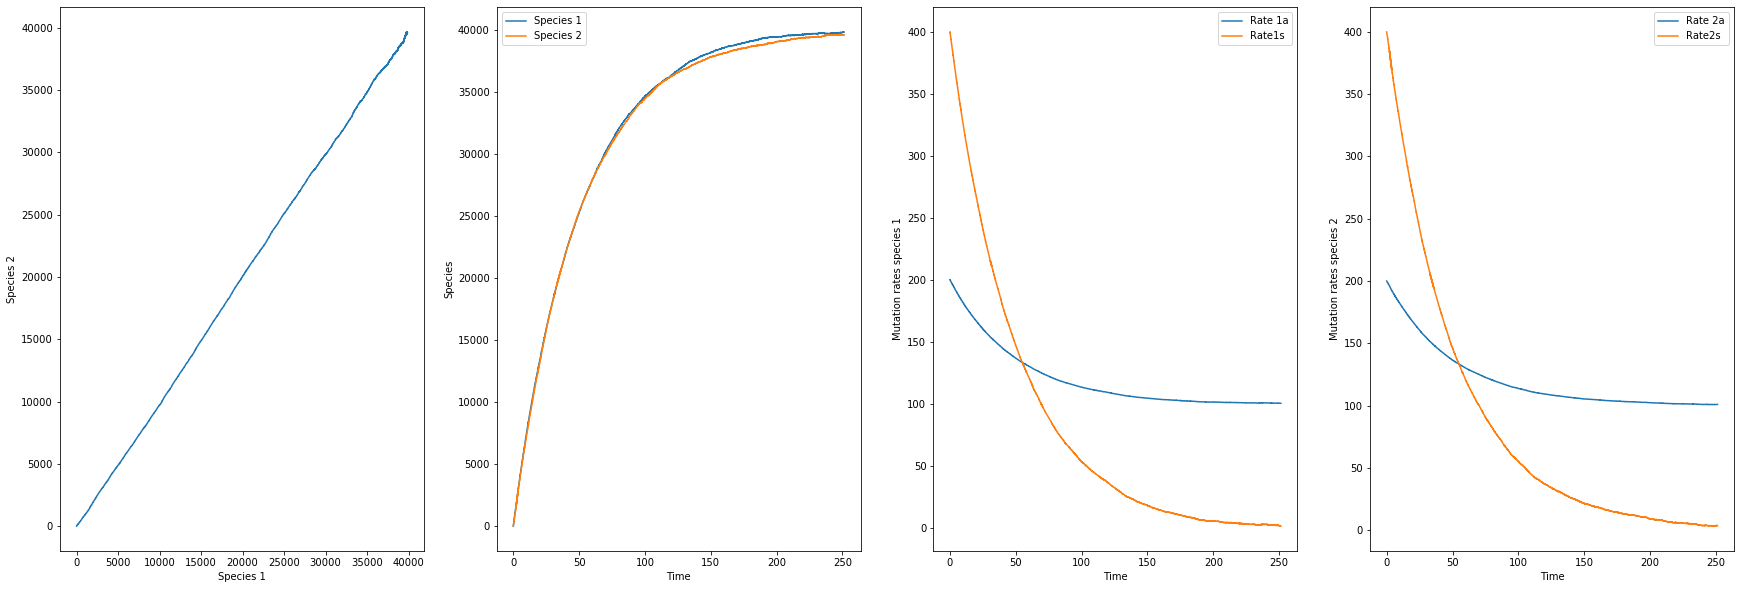

In [28]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0025
_beta1=0.01
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

## V. Species are different.
### Case 1.I: All u are the same. this does not exist


### Case 2.I: No a (antagonistic) mutations for one and no synergistic mutation for other

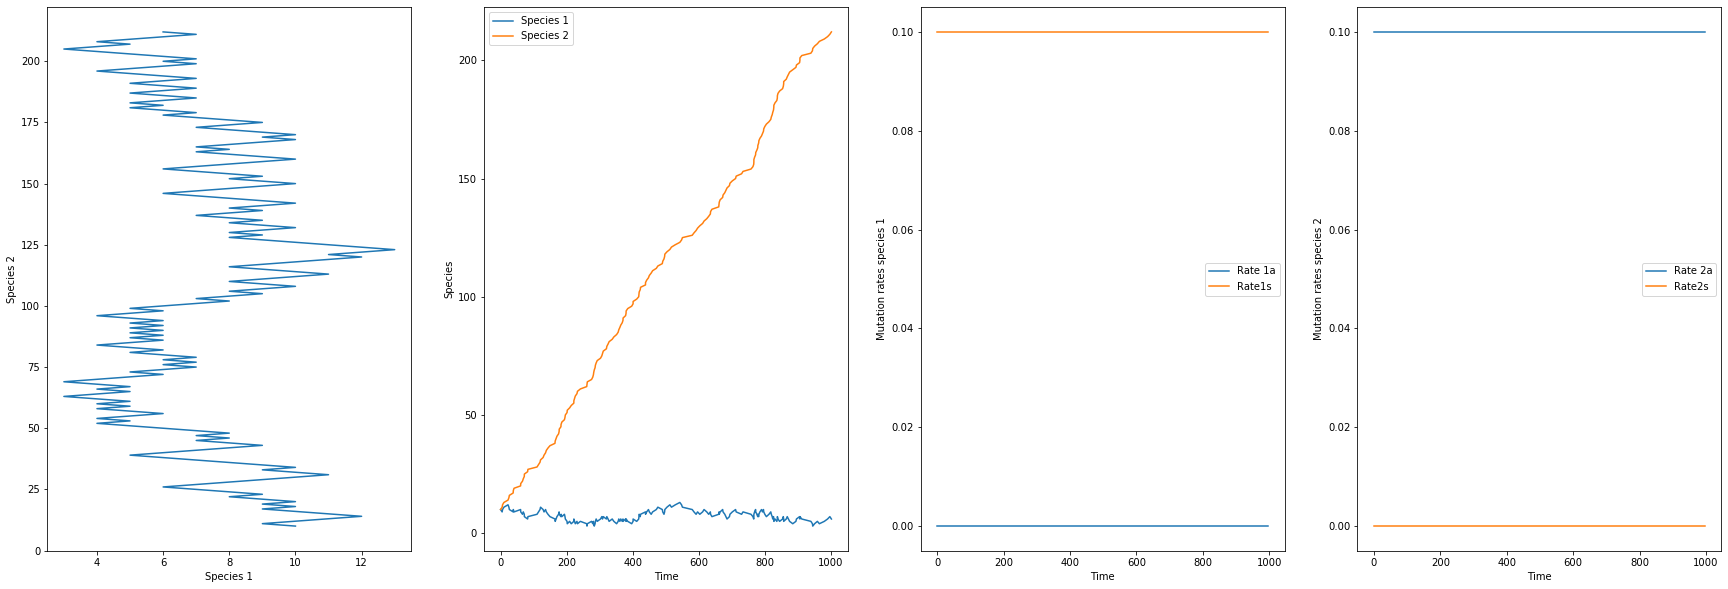

In [5]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.1
u2s=0
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 3.I: No a (antagonistic) mutations for one and 50 50 synergistic antagonist mutation for other

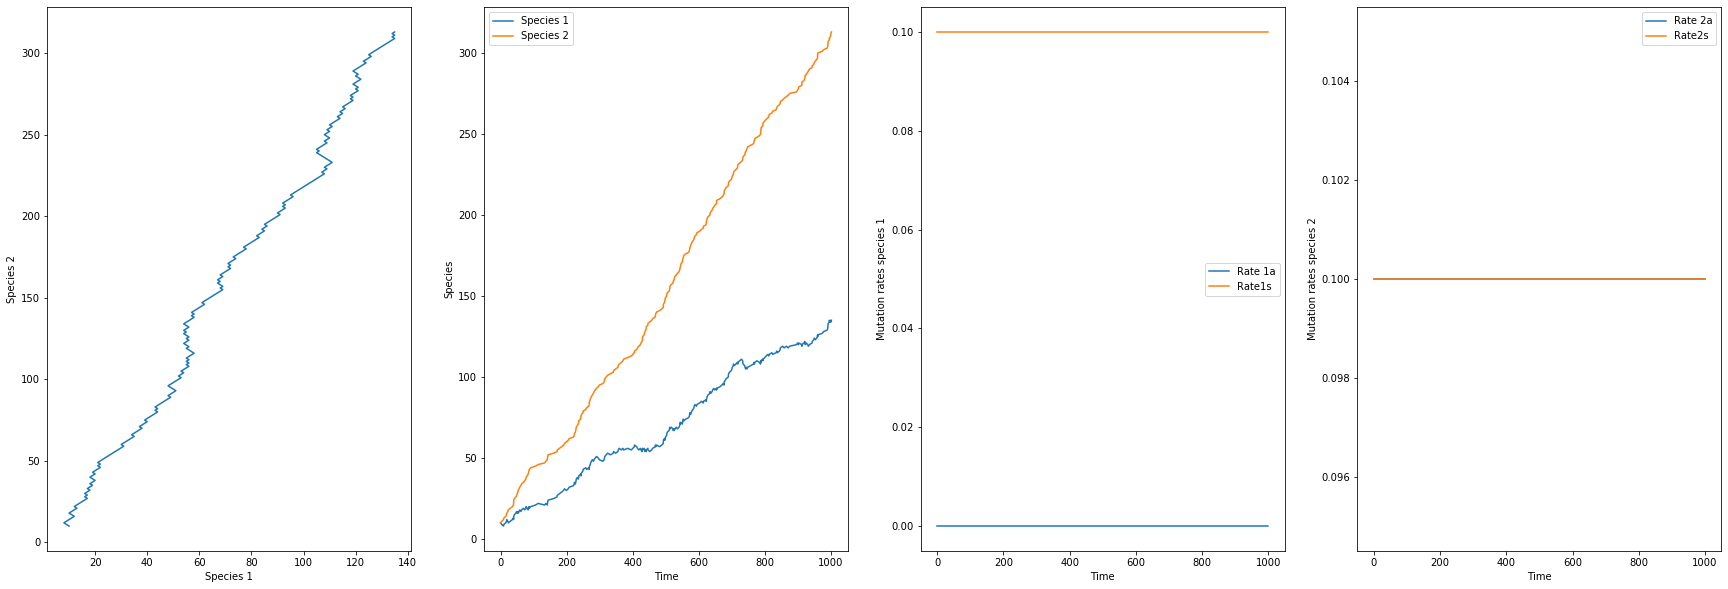

In [7]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.1
u2s=0.1
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

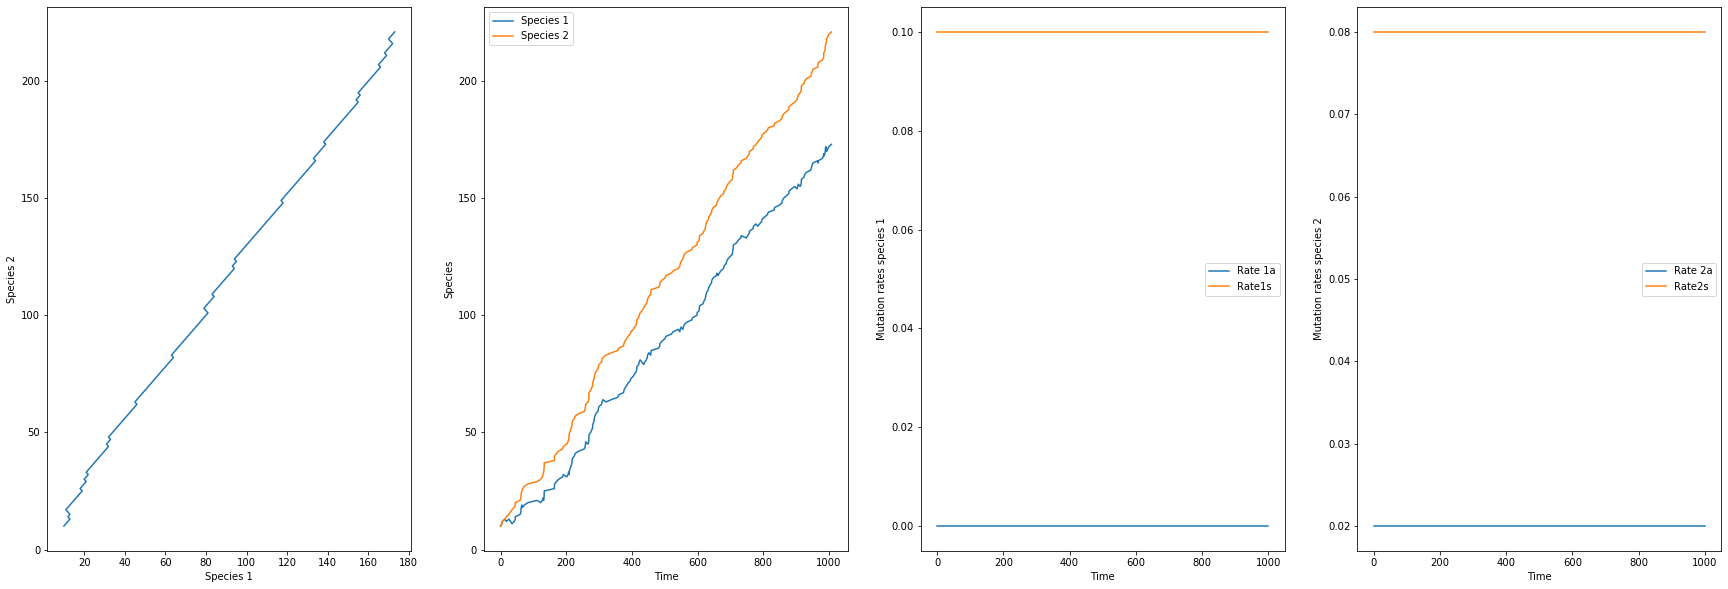

In [35]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.02
u2s=0.08


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

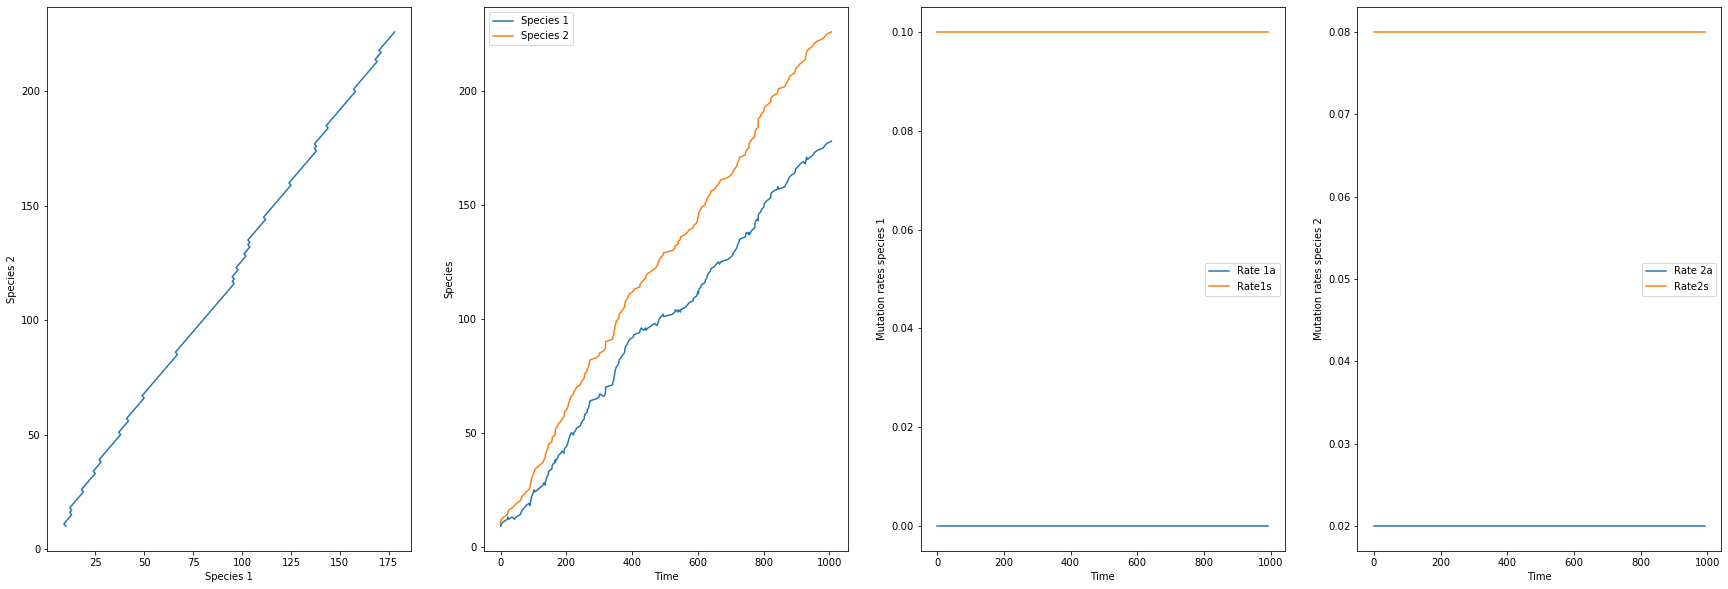

In [36]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.02
u2s=0.08

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,antagonist rate more later on

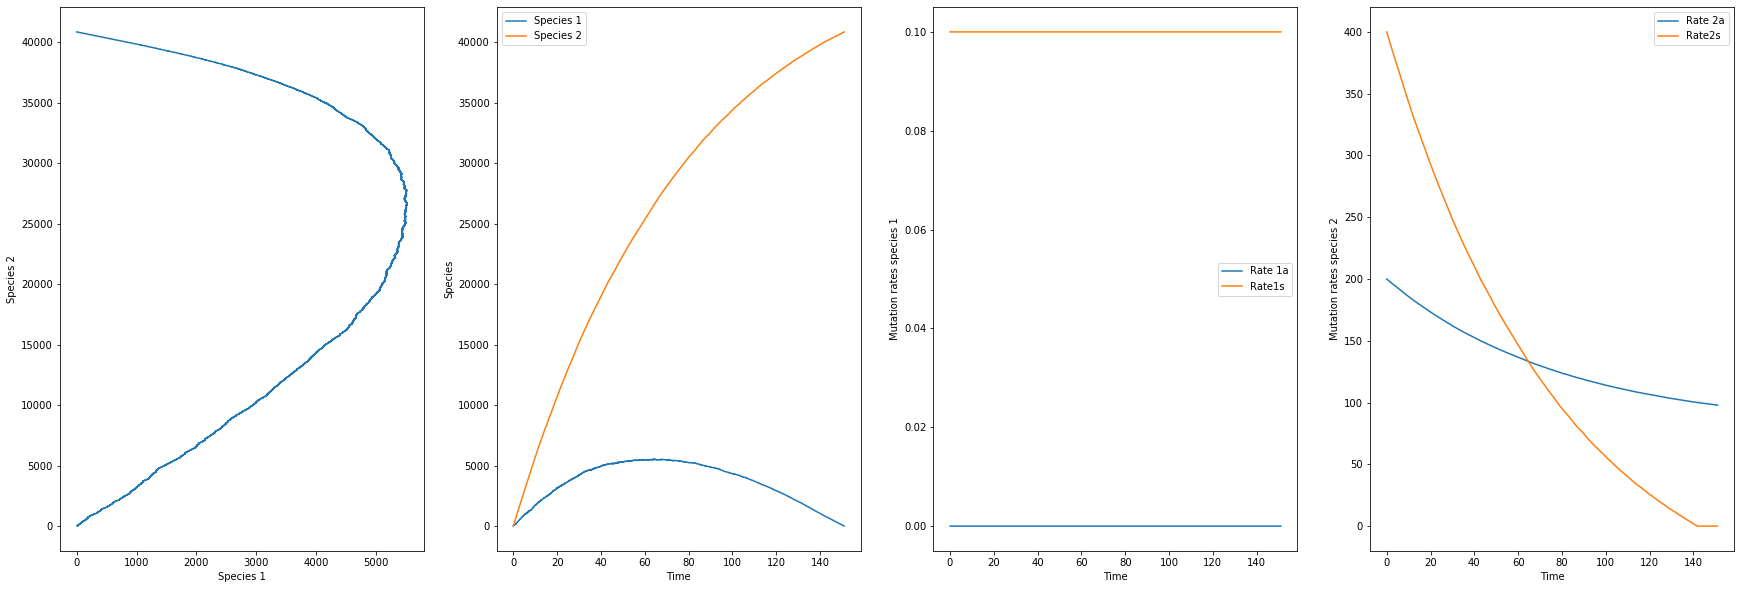

In [14]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,synergistic more later on

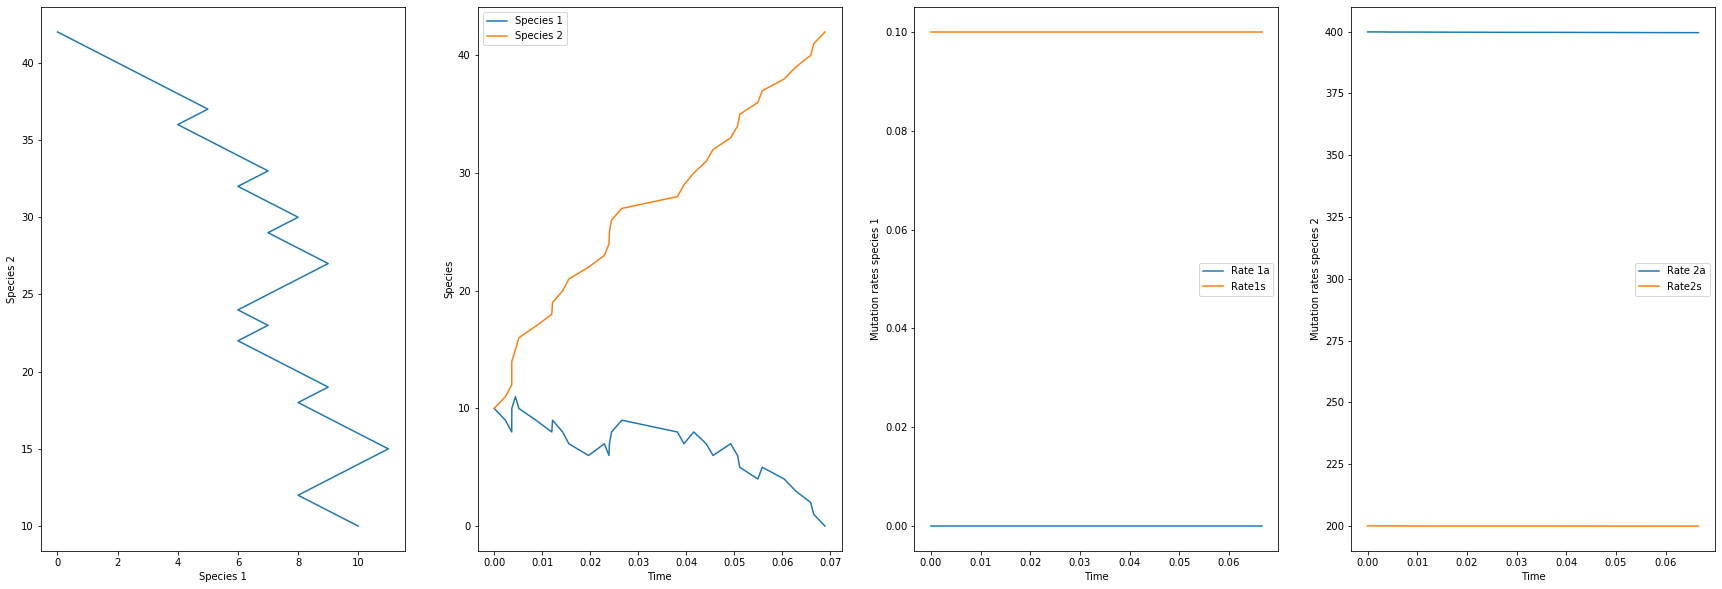

In [15]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and 50 percent antagonist and synergistic for other 

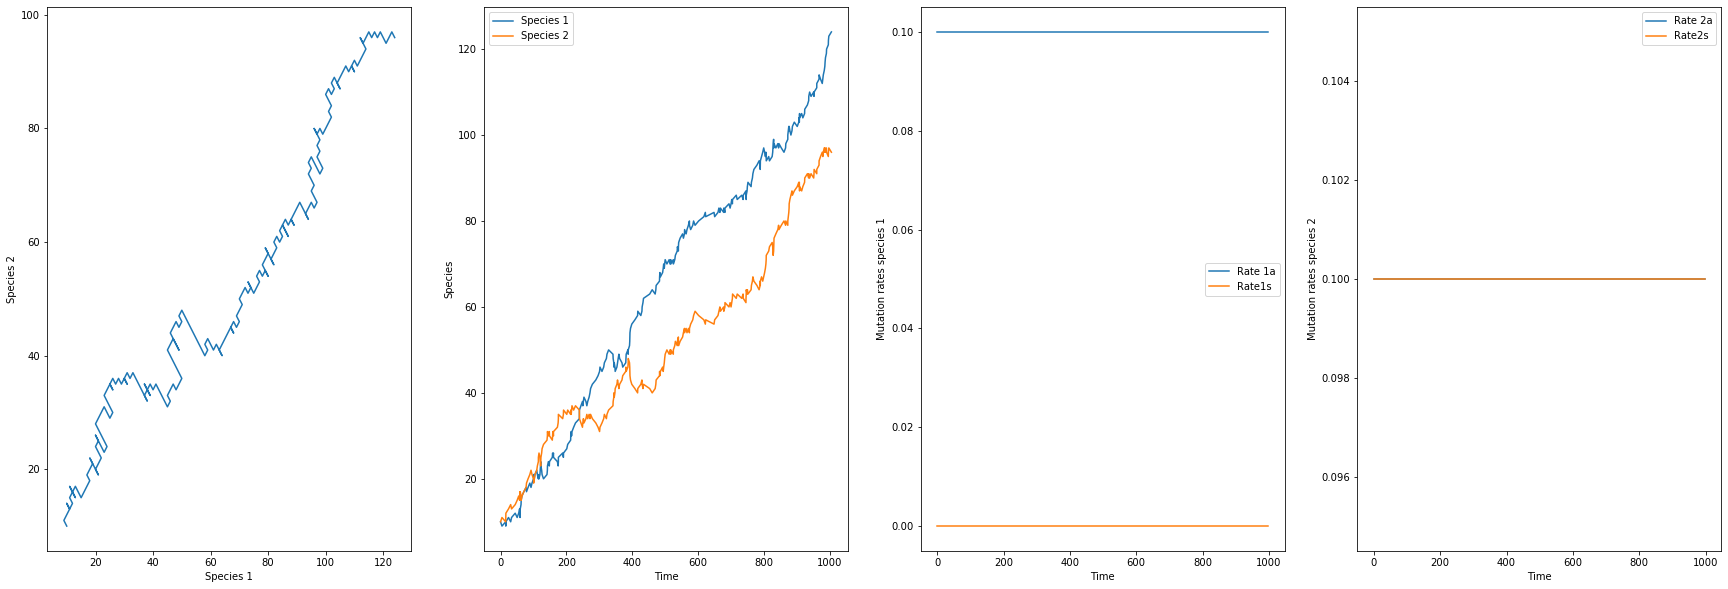

In [42]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0.1
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and antagonist more later on

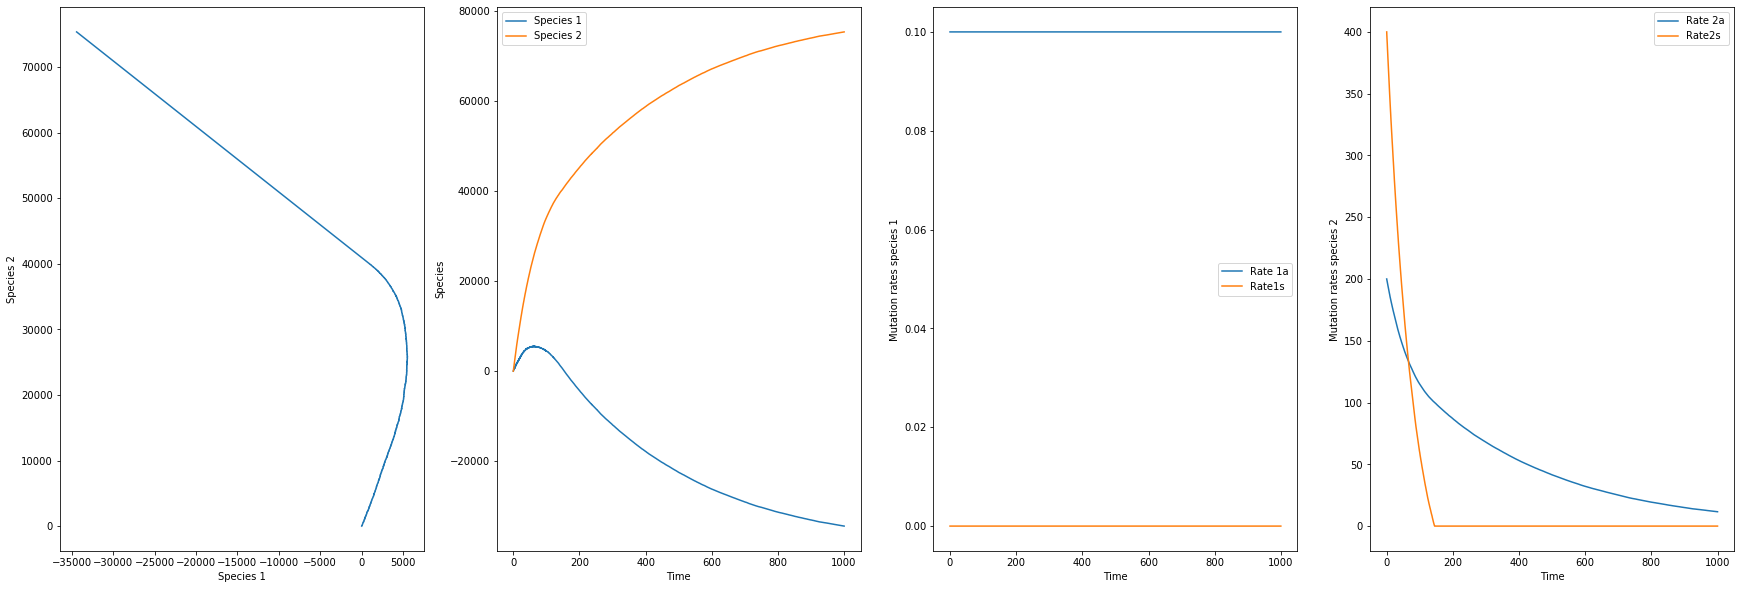

In [43]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.1
_beta1=0.0
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and synergistic more later on for other

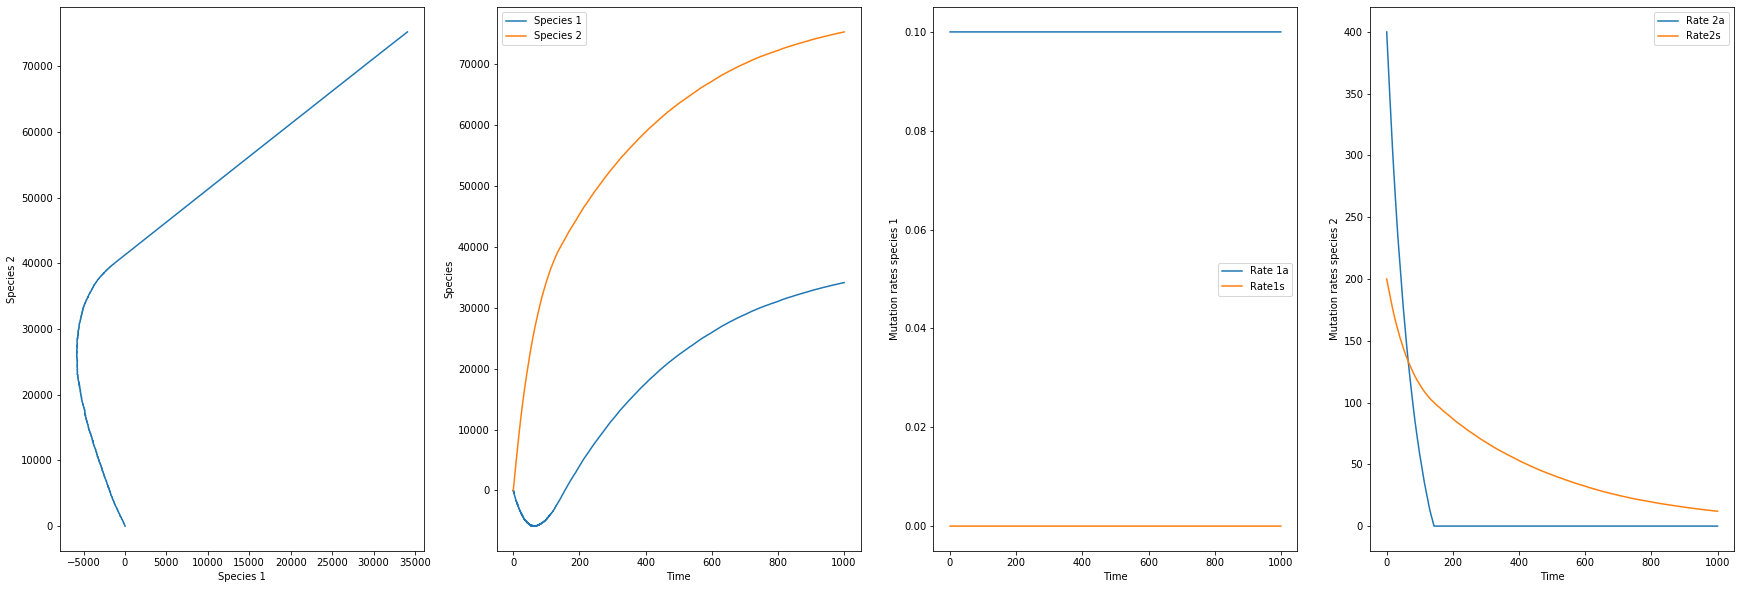

In [45]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.1
_beta1=0.0
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)